# Ponder about Estimating Probabilities with Missing Data
## Issue #34

## Warm-up

Consider a coin you just got. You tossed it three times, got $(0, 1, 0)$ and you would like to see whether it is biased.

The likelihood can be described in terms of the following generative model:
$$X_i \mid p \sim \mathrm{Bernoulli}(p)$$
with $(X_1, \dotsc, X_3) = (0, 1, 0)$.

- How does the likelihood look like? Is it concentrated around some value? Flat?

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def likelihood(p, X):
    """Compute the likelihood of a Bernoulli model.
        Args:
            p (float): probability of success i.e. p(X_i = 1)
            X (np.array): observations
        Returns:
            float: likelihood
    """
    # count numer of successes
    n_success = np.sum(X)
    # count number of failures
    n_failures = len(X) - n_success
    # compute likelihood
    # TODO: consider using p**(X) * (1-p)**(1-X) trick
    return p**n_success * (1-p)**n_failures

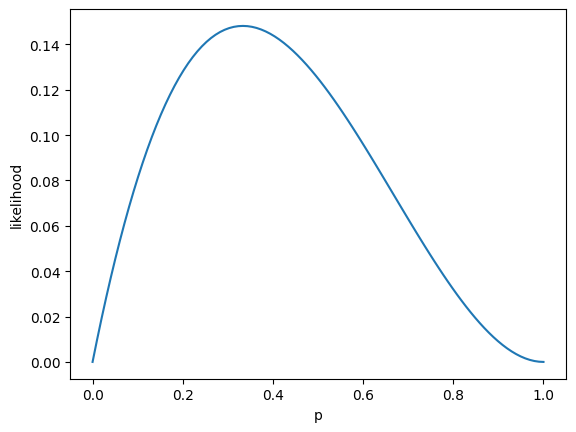

In [23]:
# Plot the likelihood
p = np.linspace(0, 1, 100)
X = np.array([0, 1, 0])
plt.plot(p, likelihood(p, X))
plt.xlabel('p')
plt.ylabel('likelihood')
plt.show()

**Answer**: The likelihood is concentrated around $p = 1/3$.

## Missing data: a naive approach

Previously we observed *all* coin tosses. Imagine now that you tried to toss the coin three times, but the third time you tossed it, it fell from the table on the floor and you didn't see the result.

In other words, you saw $(0, 1, \text{NaN})$.

- How would you intuitively model likelihood $L(p)$ in this case?
- Can you see an assumption you made here?


**Answer**: I would intuitively model the likelihood as $L(p) = p^1 (1-p)^1$, simple neglecting the missing data.
The assumption is that the missing data is missing completely at random (MCAR).

_Ref:_
[Handling Missing Data by Maximum Likelihood](https://statisticalhorizons.com/wp-content/uploads/MissingDataByML.pdf)

## Missing completely at random

Imagine now that Mr. Odin is tossing the coin three times. However, whenever he tosses a coin, he also throws a six-sided dice. If he sees 1, he *will not* reveal the result to you.

In other words, the generative model is now:
$X_i \mid p \sim \mathrm{Bernoulli}(p)$
$Y_i \sim \mathrm{Categorical}(1/6, 1/6, \dotsc, 1/6)$
$$(E_i \mid X_i, Y_i) =  X_i\ \text{ if } Y_i \neq 1\ \text{ else }  \text{NaN}$$

You observed $(E_1, E_2, E_3) = (0, 1, \text{NaN})$.

  - What is the likelihood $L(p)$?

In [46]:
def likelihood_mcar(p, X):
    """Compute the likelihood of a Bernoulli model.
        Args:
            p (float): probability of success i.e. p(X_i = 1)
            X (np.array): observations
        Returns:
            float: likelihood
    """
    # count numer of successes
    n_success = np.sum(np.where(X ==1, 1,0))
    # count number of failures
    n_failures = np.sum(np.where(X ==0, 1,0))
    # count number of missing data
    n_nan = np.sum(np.isnan(X))
    print(n_nan)

    # compute likelihood
    return p**n_success *5/6 * (1-p)**n_failures *5/6 * (1/6)**n_nan

1


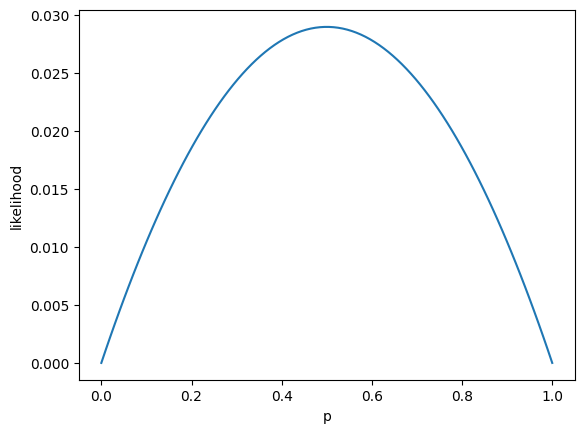

In [47]:
# Plot the likelihood
p = np.linspace(0, 1, 100)
X = np.array([0, 1, np.nan])
plt.plot(p, likelihood_mcar(p, X))
plt.xlabel('p')
plt.ylabel('likelihood')
plt.show()

**Answer**: The likelihood is concentrated around $p = 1/3$. The missing data is missing completely at random (MCAR).

## Other types of missing data

Now Mr. Loki is tossing the coin three times and he will again use (a fair) dice. However, he wants to cheat you: whenever he sees 1, he will try to underreport it. He is using the following model:

$X_i \mid p \sim \mathrm{Bernoulli}(p)$
$Y_i \sim \mathrm{Categorical}(1/6, 1/6, \dotsc, 1/6)$
$$(E_i \mid X_i, Y_i) =  \text{NaN  if }  \bigg((X_i=1 \text{ and } Y_i \le 3) \text{ or } (X_i=0 \text{ and } Y_i=1)\bigg) \text{ else }X_i.$$

  - You were told the answers $(0, 1, \text{NaN})$. How does the likelihood $L(p)$ look like in this case?
  - Take a look at Section 1.1 and Section 1.2 of [this book](https://stefvanbuuren.name/fimd/sec-problem.html).

In [58]:
def likelihood_ot_formal(p,X):
    """Compute the likelihood of a Bernoulli model as specified above.
        Args:
            p (float): probability of success i.e. p(X_i = 1)
            X (np.array): observations
        Returns:
            float: likelihood
    """
    # count numer of successes
    n_success = np.sum(np.where(X ==1, 1,0))
    # count number of failures
    n_failures = np.sum(np.where(X ==0, 1,0))
    # count number of missing data
    n_nan = np.sum(np.isnan(X))

    # compute likelihood
    p_0 = (5/6 *(1-p)) ** n_failures
    p_1 = (1/2 *p )** n_success
    p_nan = (1/6 * (1-p) + p/2)**n_nan
    return p_0*p_1*p_nan

In [59]:
def likelihood_ot_intuitive(p,X):
    """Compute the likelihood of a Bernoulli model as specified above.
        Args:
            p (float): probability of success i.e. p(X_i = 1)
            X (np.array): observations
        Returns:
            float: likelihood
    """
    # count numer of successes
    n_success = np.sum(np.where(X ==1, 1,0))
    # count number of failures
    n_failures = np.sum(np.where(X ==0, 1,0))
    # count number of missing data
    n_nan = np.sum(np.isnan(X))
    # probability of X=1 and Y<=3
    p1 = p*(3/6)
    # probability of X=0 and Y=1
    p2 = (1-p)*(1/6)
    return (p1+p2)**n_nan * p**n_success * (1-p)**n_failures

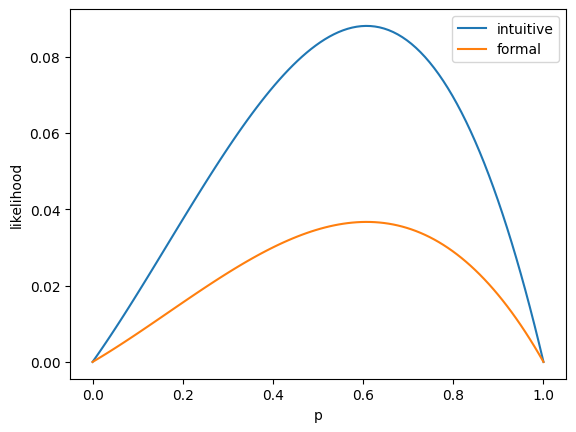

In [62]:
# Plot the likelihood
p = np.linspace(0, 1, 100)
X = np.array([0, 1, np.nan])
plt.plot(p, likelihood_ot_intuitive(p, X), label='intuitive')
plt.plot(p, likelihood_ot_formal(p, X), label='formal')
plt.xlabel('p')
plt.ylabel('likelihood')
plt.legend()
plt.show()

**Answer**: The likelihood is peaked at around 0.6, i.e. slightly towards the side of the coin that is more likely to be heads. This makes sense as we have observed equal amount of heads and tails, but the missing data is biased towards heads.

Alright, there is some issue with the intuitive version of the likelihood. But I worked out the formal version. The maximum likelihood estimate is 0.6, same as the intuitive version. So I guess the intuitive version is only slightly wrong.

Took a look at the book. Nice Resource!